### Loading all neccessory python libraries

In [1]:
# Import necessary libraries
import os  # Operating system functions
import re  # Regular expressions
import numpy as np  # Numerical computing
import pandas as pd  # Data manipulation and analysis
import rasterio  # Raster data manipulation
import matplotlib.pyplot as plt  # Plotting library
import matplotlib.colors as mcolors  # Custom color maps
from pymannkendall import original_test  # Mann-Kendall trend test

### Creating neccessory functions

In [2]:
# Function for natural key sorting
def atoi(text):
    """
    Convert a string to an integer if possible.

    Args:
        text (str): The input string.

    Returns:
        int or str: The converted integer or the original string.
    """
    return int(text) if text.isdigit() else text

def natural_keys(text):
    """
    Convert a string to a list of integers and strings for natural sorting.

    Args:
        text (str): The input string.

    Returns:
        list: A list of integers and strings.
    """
    return [atoi(c) for c in re.split(r'(\d+)', text)]


### Function to perform the Mann-Kendall test and return the slope, intercept, and p-value

We will use the pyMannKendall library for this purpose.

pyMannKendall provides 13 different versions of the MK test, including modified Mann-Kendall tests, Multivariate MK Test, Regional MK Test, Correlated MK test, Partial MK Test, etc.

Here, we will use the Original Mann-Kendall test (original_test): The Original Mann-Kendall test is a nonparametric test that does not consider serial correlation or seasonal effects.

The test will return a tuple containing the named parameters:

1. trend: indicates the trend (increasing, decreasing, or no trend),
2. h: True (if a trend is present) or False (if the trend is absent),
3. p: p-value of the significance test,
4. z: normalized test statistics,
5. Tau: Kendall Tau,
6. s: Mann-Kendall’s score,
7. var_s: Variance S,
8. slope: Theil-Sen estimator/slope,
9. intercept: intercept of Kendall-Theil Robust Line

In [3]:
def mk_test(data):
    """
    Perform the Mann-Kendall test and obtain the slope, intercept, and p-value.

    Args:
        data (array_like): The input data for the test.

    Returns:
        tuple: A tuple containing the slope, intercept, and p-value.
    """
    # Perform the test and obtain the results
    result = original_test(data)
    
    # Extract slope, intercept, and p-value from the result
    slope, intercept, p = result.slope, result.intercept, result.p
    
    return slope, intercept, p

## Mann kendal calculate using excel
This code defines the file path to an Excel file containing Mann-Kendall (MK) test data. It then reads the data from the specified Excel file into a Pandas DataFrame.

In [4]:
# Define the file path
file_path = r'C:\Users\dharpure.1\OneDrive - The Ohio State University\Paper work\YouTube video\Mann-Kendall trend test'
input_filename = 'MK data.xlsx'

# Combine the file path and input filename
input_file_path = os.path.join(file_path, input_filename)

# Read data from Excel file
data_frame = pd.read_excel(input_file_path, sheet_name='Sheet1', engine='openpyxl')

In [5]:
data_frame

,Year,Winter,Summar
0,2003,-0.183200,4.084343
1,2004,2.712593,5.602934
2,2005,-0.538402,-1.556085
3,2006,-0.421414,4.937098
4,2007,1.762732,0.381096
5,2008,-2.856799,2.474225
6,2009,-2.706600,-1.001254
7,2010,-6.395918,-3.279456
8,2011,-2.776098,-0.972216
9,2012,-2.721499,-1.501517


### Save result in excel
This code performs the Mann-Kendall test on each column in a Pandas DataFrame. It calculates the slope, intercept, and p-value for each column and stores the results in a new DataFrame. The results are then saved to an Excel file, with each column's results organized into rows.

In [6]:
# Set index starting from 1
data_frame.index = range(1, len(data_frame) + 1)

# Initialize lists to hold results
mk_results = {
    'Column': [],  # List to store column names
    'Slope': [],   # List to store slope values
    'P-value': []  # List to store p-values
}

# Perform the Mann-Kendall test on each column in the data frame
for column_name in data_frame.columns[1:]:
    # Calculate the slope, intercept, and p-value for the current column
    slope, intercept, p_value = mk_test(data_frame[column_name])
    
    # Store the results in the lists
    mk_results['Column'].append(column_name)
    mk_results['Slope'].append(slope)
    mk_results['P-value'].append(p_value)

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(mk_results)

# Define the save path for the results
save_path = os.path.join(file_path, "MK Test")

# Create the output directory if it doesn't exist
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Define the output file path
output_filename = 'MK result.xlsx'
output_file_path = os.path.join(save_path, output_filename)

# Save the results to an Excel file
results_df.to_excel(output_file_path, index=False)

print("Mann-Kendall test results saved to", output_file_path)

Mann-Kendall test results saved to C:\Users\dharpure.1\OneDrive - The Ohio State University\Paper work\YouTube video\Mann-Kendall trend test\MK Test\MK result.xlsx


### Plot the trend using matplotlib

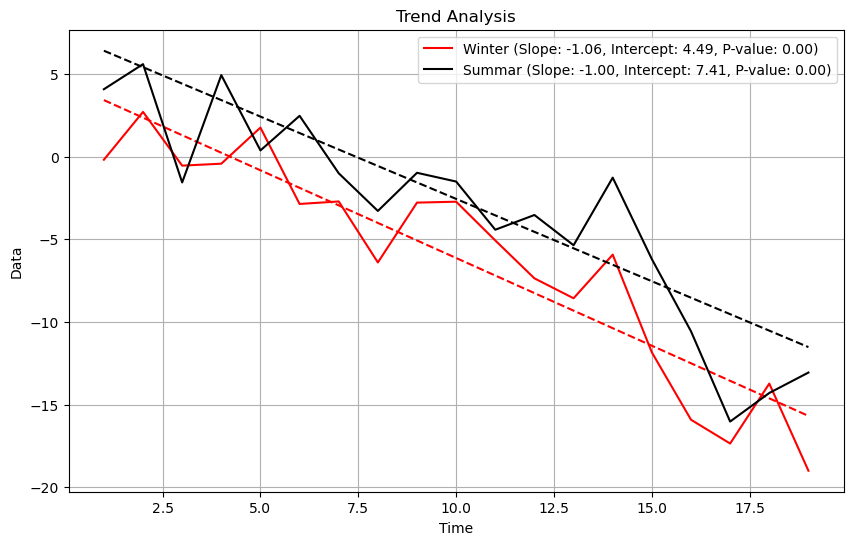

In [7]:
# Plot the trend using matplotlib
plt.figure(figsize=(10, 6))  # Set the figure size
colors = ['red', 'black']  # Define colors for different columns

# Iterate over each column in the data frame
for i, column_name in enumerate(data_frame.columns[1:]):
    slope, intercept, p_value = mk_test(data_frame[column_name])  # Perform the Mann-Kendall test
    # Plot the data with corresponding label and color
    plt.plot(data_frame.index, data_frame[column_name], label=f'{column_name} (Slope: {slope:.2f}, Intercept: {intercept:.2f}, P-value: {p_value:.2f})', color=colors[i % len(colors)])  # Use modulus to cycle through colors
    if p_value < 0.05:
        # Plot the trend line for significant trends
        plt.plot(data_frame.index, slope * data_frame.index + intercept, linestyle='--', color=colors[i % len(colors)])

plt.xlabel('Time')  # Set x-axis label
plt.ylabel('Data')  # Set y-axis label
plt.title('Trend Analysis')  # Set the title of the plot
plt.legend()  # Display legend
plt.grid(True)  # Show grid
plt.show()  # Display the plot


## Calculate trend from geographical mean of raster data and save in excel 

### Function to calculate mean of a GeoTIFF file

In [8]:
# Define a function to calculate the mean and standard deviation of a GeoTIFF file
def calculate_mean_std(tif_file):
    try:
        with rasterio.open(tif_file) as src:
            data = src.read(1, masked=True)  # Read data from GeoTIFF
            nodata_value = src.nodatavals[0]  # Get nodata value
            
            # Remove nodata values
            data_no_nodata = data.compressed()  # Equivalent to data[~data.mask]
            
            # Calculate mean value
            mean_value = data_no_nodata.mean()
            # Return the mean value
            return mean_value
    
    except Exception as e:
        print(f"Error processing {tif_file}: {e}")  # Print error message if an exception occurs
        return np.nan  # Return NaN if there is an error

### Raster mean value save in excel file
This code processes specified folder directory, calculates the mean value of each GeoTIFF file in the folder, and stores the results in a dictionary. Finally, it converts the dictionary to a DataFrame and saves it to an Excel file.

In [9]:
# Base directory path
folder_path = r"C:\Users\dharpure.1\OneDrive - The Ohio State University\Paper work\YouTube video\Mann-Kendall trend test\TWSA\\"

# Initialize a dictionary to store results
results_dict = {'Year': []}

# Get list of GeoTIFF files in the current folder
tif_files = [f for f in os.listdir(folder_path) if f.endswith('.tif')]
# Sort files naturally
tif_files.sort(key=natural_keys)

# Initialize lists to store mean values
mean_list = []

# Iterate through files and calculate mean values
for tif_file in tif_files:
    tif_path = os.path.join(folder_path, tif_file)
    mean_value = calculate_mean_std(tif_path)

    # Append mean value to the list
    mean_list.append(mean_value)
    
    results_dict['Year'].append(tif_file.rstrip('.tif'))

# Add mean values to results dictionary
results_dict['TWSA'] = mean_list

# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results_dict)

# Save DataFrame to Excel file
results_df.to_excel(os.path.join(folder_path, 'Raster mean value.xlsx'), index=False)

print("Results saved to Raster mean value.xlsx")

Results saved to Raster mean value.xlsx


In [10]:
results_df

,Year,TWSA
0,2003,3.836513
1,2004,2.195092
2,2005,2.141460
3,2006,-1.320813
4,2007,-1.489826
5,2008,-4.250554
6,2009,-4.610045
7,2010,-6.695806
8,2011,-4.747638
9,2012,-6.216261


### Plot the trend using matplotlib

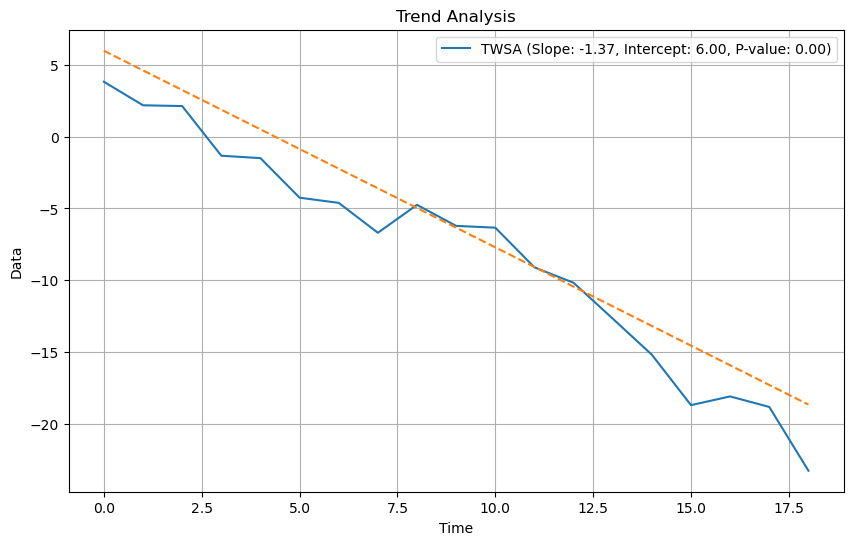

In [11]:
# Set figure size
plt.figure(figsize=(10, 6))

# Iterate over each column in the DataFrame starting from the second column
for column_name in results_df.columns[1:]:
    # Calculate slope, intercept, and p-value
    slope, intercept, p_value = mk_test(results_df[column_name])
    
    # Plot the data for the current column
    plt.plot(results_df.index, results_df[column_name], label=f'{column_name} (Slope: {slope:.2f}, Intercept: {intercept:.2f}, P-value: {p_value:.2f})')
    
    # Plot trend line for significant trends (p-value < 0.05)
    if p_value < 0.05:
        plt.plot(results_df.index, slope * results_df.index + intercept, linestyle='--')  

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Trend Analysis')

# Show legend, grid, and plot
plt.legend()
plt.grid(True)
plt.show()


## Spatial Mann-Kendall Test
This code processes raster data stored as GeoTIFF files. It reads the data from each GeoTIFF file, performs the Mann-Kendall test on each pixel, calculates the slope and p-value, and stores the results in separate arrays. The code then saves the slope and p-value arrays as new GeoTIFF files, preserving the metadata of the original files.

In [12]:
# Define the data path and list of input files
path_data = r'C:\Users\dharpure.1\OneDrive - The Ohio State University\Paper work\YouTube video\Mann-Kendall trend test\TWSA\\'
files_list = [f for f in os.listdir(path_data) if f.endswith(".tif")]

# Open a sample file to get metadata and nodata value
with rasterio.open(os.path.join(path_data, files_list[0])) as src:
    profile = src.profile
    nodata = src.nodatavals[0]

# Sort files naturally
files_list.sort(key=natural_keys)
array_path_list = [os.path.join(path_data, f) for f in files_list]

# Initialize an array to store raster data
raster_data = []

# Read each file and append its data to the raster_data list
for file in array_path_list:
    with rasterio.open(file) as src:
        data = src.read(1, masked=True)
        raster_data.append(data)

# Convert list of rasters to a numpy array
raster_data = np.array(raster_data)

# Get the dimensions of the data
rows, cols = raster_data.shape[1], raster_data.shape[2]

# Define the save path for the results
save_path = os.path.join(path_data, "MK Test")

# Create the output directory if it doesn't exist
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Initialize arrays for slope and p-value
slope_array = np.full((rows, cols), nodata, dtype=np.float32)
p_array = np.full((rows, cols), nodata, dtype=np.float32)

# Perform the Mann-Kendall test on each pixel
for r in range(rows):
    for c in range(cols):
        # Exclude nodata values
        if raster_data[0, r, c] != nodata:
            slope,__, p = mk_test(raster_data[:, r, c])
            slope_array[r, c] = slope
            p_array[r, c] = p

# Update profile for the slope and p-value rasters
profile.update(
    dtype=rasterio.float32,
    count=1,
    nodata=nodata
)

# Save the slope raster
slope_filename = os.path.join(save_path, "slope.tif")
with rasterio.open(slope_filename, "w", **profile) as dst:
    dst.write(slope_array, 1)

# Save the p-value raster
p_filename = os.path.join(save_path, "p.tif")
with rasterio.open(p_filename, "w", **profile) as dst:
    dst.write(p_array, 1)

print(f"Saved slope and p-value rasters to {save_path}")

Saved slope and p-value rasters to C:\Users\dharpure.1\OneDrive - The Ohio State University\Paper work\YouTube video\Mann-Kendall trend test\TWSA\\MK Test


### Plot the trend using matplotlib

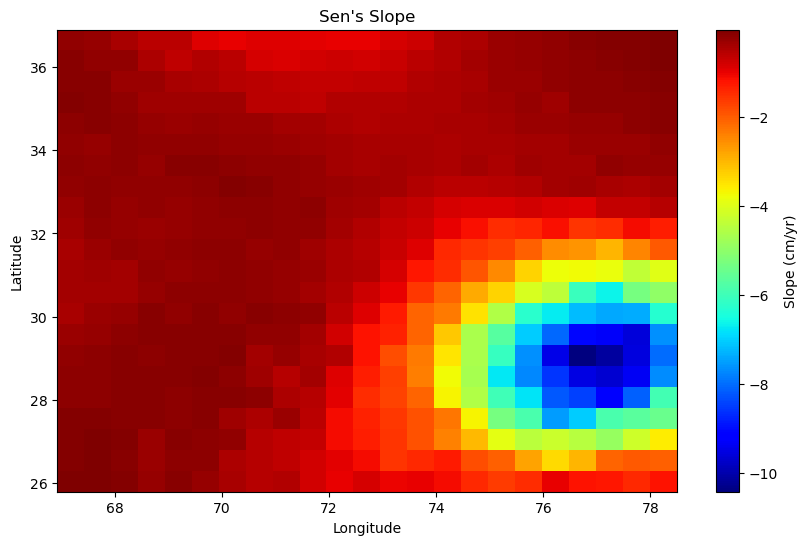

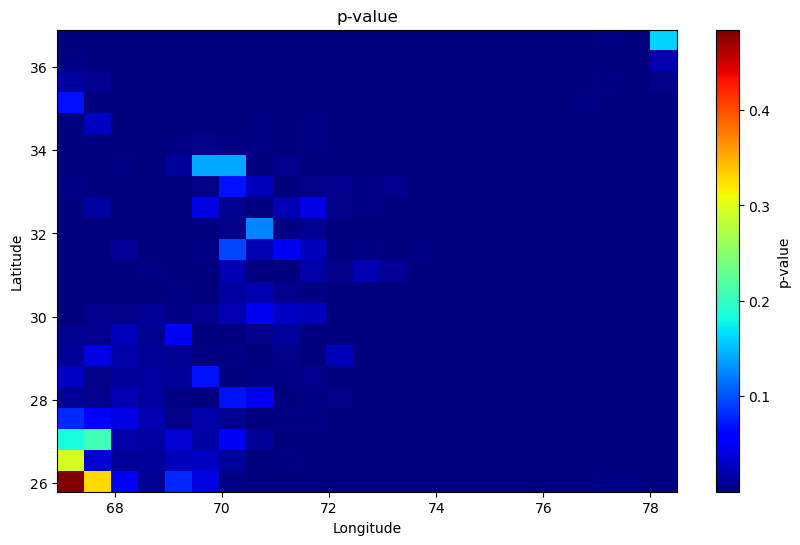

In [13]:
# Define longitude and latitude arrays
lon = np.linspace(profile["transform"][2], profile["transform"][2] + cols * profile["transform"][0], cols)
lat = np.linspace(profile["transform"][5], profile["transform"][5] + rows * profile["transform"][4], rows)

# Create mesh grid for longitude and latitude
lon_grid, lat_grid = np.meshgrid(lon, lat)

# Set figure size
figsize = (10, 6)

# Plot slope
plt.figure(figsize=figsize)
plt.imshow(slope_array, extent=[lon.min(), lon.max(), lat.min(), lat.max()], cmap='jet', aspect='auto')
plt.colorbar(label='Slope (cm/yr)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("Sen's Slope")
plt.show()

# Plot p-value
plt.figure(figsize=figsize)
plt.imshow(p_array, extent=[lon.min(), lon.max(), lat.min(), lat.max()], cmap='jet', aspect='auto')
plt.colorbar(label='p-value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('p-value')
plt.show()


### Plot significant and non-significant pixel based on p-values

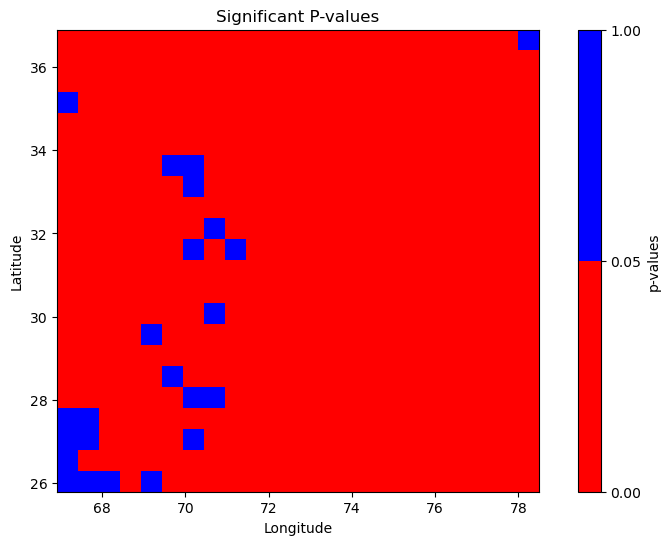

In [14]:
# Plot significant p-values
plt.figure(figsize=figsize)  # Set figure size here
# Set colorbar range
divnorm = mcolors.TwoSlopeNorm(vmin=0, vcenter=0.05, vmax=1)
# Colormap
colors = ['red', 'blue']
cmap = mcolors.ListedColormap(colors)
# Plot the p-values
plt.imshow(p_array, norm=divnorm, extent=[lon.min(), lon.max(), lat.min(), lat.max()], cmap=cmap)
plt.colorbar(label='p-values', ticks=[0, 0.05, 1])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Significant P-values')
plt.show()